# Final Project: Regression Analysis
**Author:** Kiruthikaa Natarajan Srinivasan  
**Date:** 2025-11-21  

## Introduction
Healthcare providers and insurance companies often need to estimate medical costs for individuals based on demographic and lifestyle factors. Accurate predictions can help in pricing insurance plans, managing risk, and understanding cost drivers.

In this project, I apply regression modeling techniques to the **Medical Cost dataset**. The dataset contains information about patients such as age, sex, BMI, number of children, smoking status, and region. The target variable is **charges**, which represents the medical insurance cost billed to the individual.

The goals of this project are to:
- Explore and clean the dataset
- Select and justify features for predicting medical charges
- Train regression models and evaluate their performance
- Compare multiple regression approaches (linear vs. polynomial pipelines)
- Document findings and reflections in a structured notebook

# Section 1. Import and Inspect the Data
1.1 Load the dataset and display the first 10 rows.

1.2 Check for missing values and display summary statistics.

In [26]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures


import warnings
warnings.filterwarnings('ignore')

# 1.1 Load the dataset and display the first 10 rows.
# Load the insurance dataset
df = pd.read_csv('data/insurance.csv', header=None, names=column_names)

# Display first 10 rows
df.head(10)

## 1.2 Check for missing values and display summary statistics
# Check data types and non-null counts
df.info()

# Check missing values
df.isna().sum()

# Summary statistics for numerical columns
df.describe()

# Quick look at categorical columns
df.describe(include="object")

# Convert numeric columns to proper types
numeric_cols = ["age", "bmi", "children", "charges"]

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Verify conversion
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       1339 non-null   object
 1   sex       1339 non-null   object
 2   bmi       1339 non-null   object
 3   children  1339 non-null   object
 4   smoker    1339 non-null   object
 5   region    1339 non-null   object
 6   charges   1339 non-null   object
dtypes: object(7)
memory usage: 73.4+ KB


age         float64
sex          object
bmi         float64
children    float64
smoker       object
region       object
charges     float64
dtype: object

In [27]:
# After conversion, check for missing values
df.isna().sum()

# Summary statistics for numeric columns
df[numeric_cols].describe()

# Quick look at categorical columns
df[["sex", "smoker", "region"]].describe()

,sex,smoker,region
count,1339,1339,1339
unique,3,3,5
top,male,no,southeast
freq,676,1064,364


## Reflection 1: What do you notice about the dataset? Are there any data issues?

- The dataset contains 1,339 rows and 7 columns: age, sex, bmi, children, smoker, region, and charges.  
- Initially, all columns were read as `object` type, so numeric features (age, bmi, children, charges) had to be converted to proper numeric types.  
- After conversion, no missing values were found, which simplifies preprocessing.  
- Categorical features (sex, smoker, region) show more unique values than expected, suggesting possible typos or inconsistent formatting (e.g., extra spaces or capitalization).  
- The target variable `charges` has a wide range and is likely skewed, which may affect regression performance.  
- Overall, the dataset is relatively clean but requires categorical cleaning and careful handling of outliers in charges and bmi.

## Section 2. Data Exploration and Preparation

### 2.1 Explore data patterns and distributions
Create histograms, boxplots, and count plots for categorical variables (as applicable).
Identify patterns, outliers, and anomalies in feature distributions.
Check for class imbalance in the target variable (as applicable).

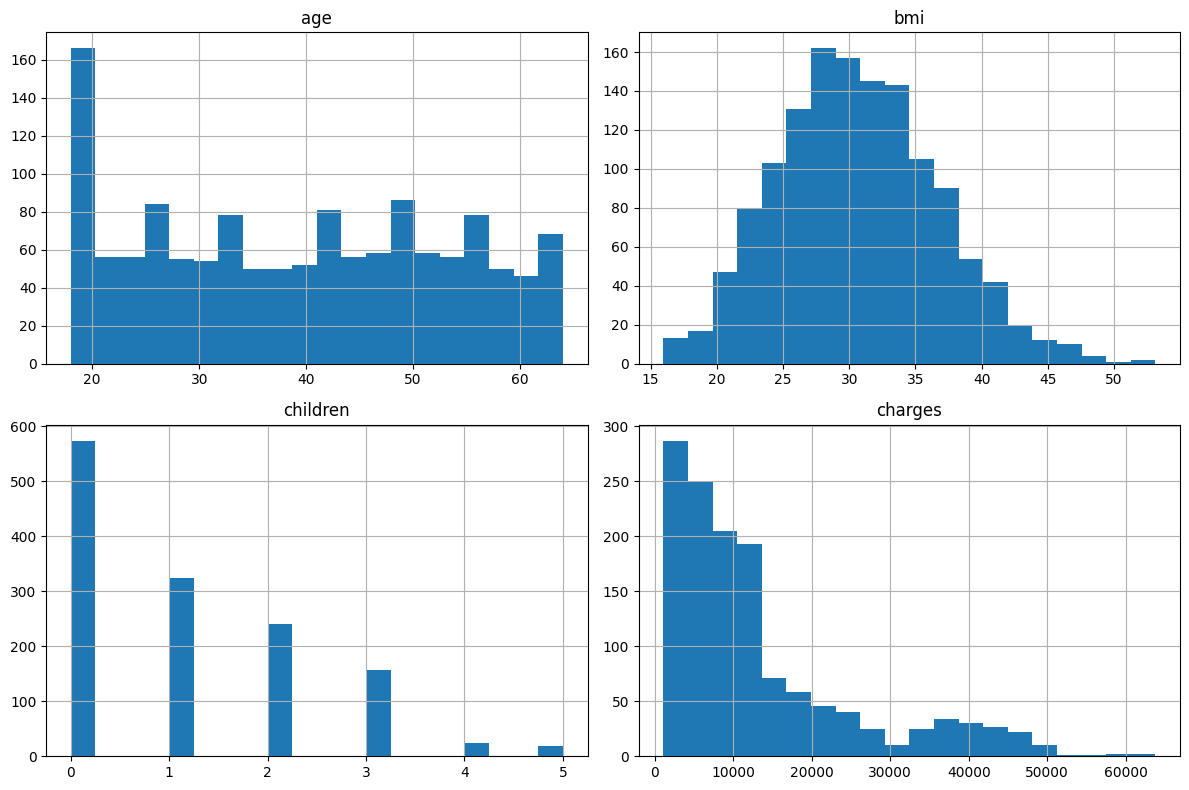

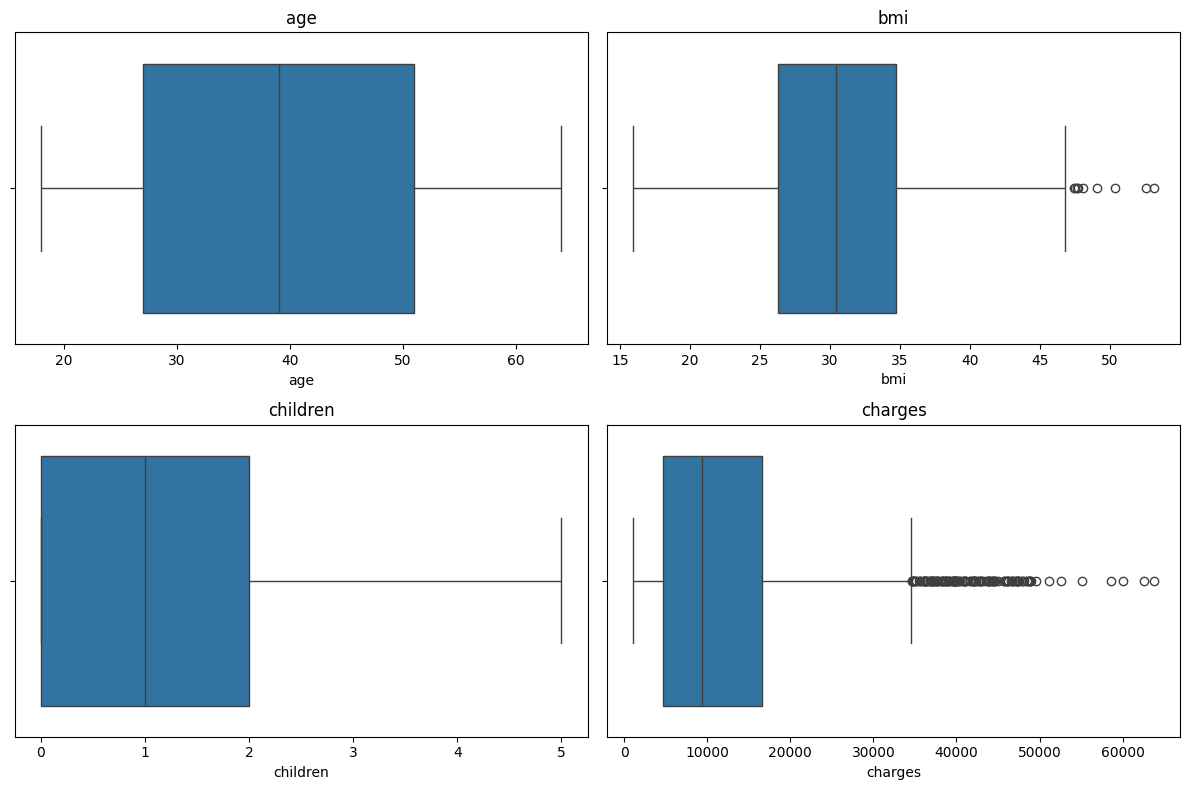

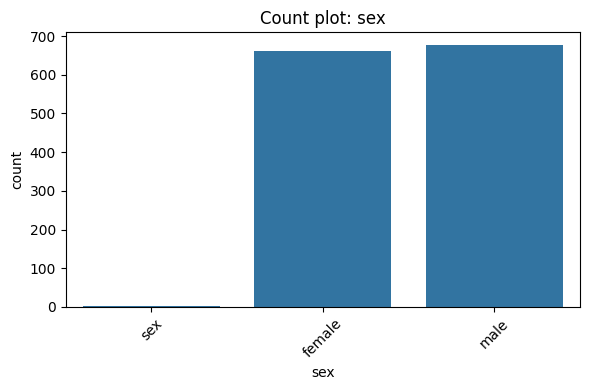

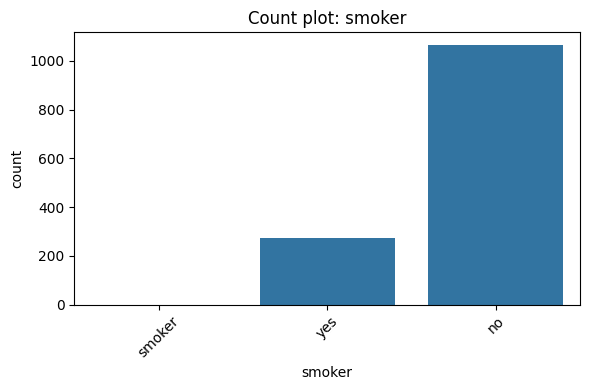

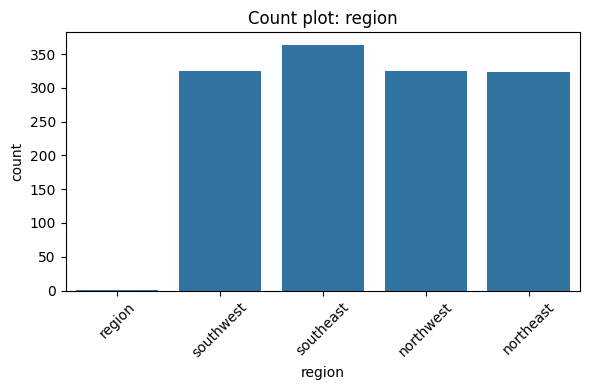

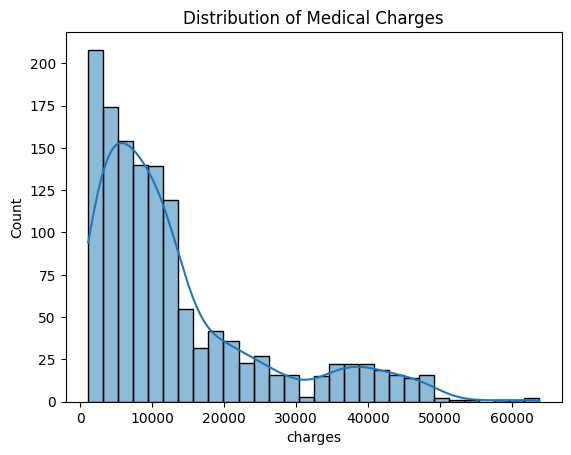

In [28]:
# Numeric columns
numeric_cols = ["age", "bmi", "children", "charges"]

# Histograms for numeric features
df[numeric_cols].hist(figsize=(12,8), bins=20)
plt.tight_layout()
plt.show()

# Boxplots for numeric features (spot outliers)
plt.figure(figsize=(12,8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# Count plots for categorical features
categorical_cols = ["sex", "smoker", "region"]
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=df[col])
    plt.title(f"Count plot: {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Distribution of target variable (charges)
sns.histplot(df["charges"], kde=True)
plt.title("Distribution of Medical Charges")
plt.show()

### Interpretation
- Age is evenly distributed across adults, with no major gaps.  
- BMI shows a roughly normal distribution but with some extreme outliers.  
- Charges are highly skewed, with a few individuals incurring very high costs.  
- Most individuals are non-smokers, and the southeast region has the largest representation, indicating some class imbalance.  
- Outliers in charges and BMI may need special handling to improve model performance.  

## 2.2 Handle missing values and clean data
Impute or drop missing values (as applicable).
Remove or transform outliers (as applicable).
Convert categorical data to numerical format using encoding (as applicable).

In [29]:
# Section 2.2: Handle Missing Values and Clean Data

# 1. Check for missing values again
print("Missing values per column:")
print(df.isna().sum())

# 2. Clean categorical values (strip spaces, lowercase)
for col in ["sex", "smoker", "region"]:
    df[col] = df[col].str.strip().str.lower()

# Verify unique values after cleaning
print("\nUnique values after cleaning:")
for col in ["sex", "smoker", "region"]:
    print(f"{col}: {df[col].unique()}")

# 3. Handle outliers
# Charges are highly skewed, so add a log-transformed version for exploration

df["log_charges"] = np.log1p(df["charges"])

# 4. Convert categorical data to numerical format (one-hot encoding)
categorical_cols = ["sex", "smoker", "region"]
df_encoded = pd.get_dummies(df[categorical_cols], drop_first=True)

# Combine numeric and encoded categorical features
numeric_cols = ["age", "bmi", "children", "charges", "log_charges"]
df_clean = pd.concat([df[numeric_cols], df_encoded], axis=1)

# Preview cleaned dataset
df_clean.head()

Missing values per column:
age         1
sex         0
bmi         1
children    1
smoker      0
region      0
charges     1
dtype: int64

Unique values after cleaning:
sex: ['sex' 'female' 'male']
smoker: ['smoker' 'yes' 'no']
region: ['region' 'southwest' 'southeast' 'northwest' 'northeast']


,age,bmi,children,charges,log_charges,sex_male,sex_sex,smoker_smoker,smoker_yes,region_northwest,region_region,region_southeast,region_southwest
0,NaN,NaN,NaN,NaN,NaN,False,True,True,False,False,True,False,False
1,19.0,27.900,0.0,16884.92400,9.734236,False,False,False,True,False,False,False,True
2,18.0,33.770,1.0,1725.55230,7.453882,True,False,False,False,False,False,True,False
3,28.0,33.000,3.0,4449.46200,8.400763,True,False,False,False,False,False,True,False
4,33.0,22.705,0.0,21984.47061,9.998137,True,False,False,False,True,False,False,False


### 2.3 Feature selection and engineering
Create new features (as applicable).
Transform or combine existing features to improve model performance (as applicable).
Scale or normalize data (as applicable).

In [30]:

# Section 2.3: Feature Selection and Engineering

# 1. Clean categorical values
for col in ["sex", "smoker", "region"]:
    df[col] = df[col].astype(str).str.strip().str.lower()

# 2. Convert numeric columns
numeric_cols = ["age", "bmi", "children", "charges"]
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# 3. Drop rows with NaN in critical numeric columns
df = df.dropna(subset=numeric_cols)

# 4. Scale numeric features
scaler = StandardScaler()
scaled_values = scaler.fit_transform(df[["age", "bmi", "charges"]])
df_scaled = pd.DataFrame(scaled_values, columns=["age_scaled", "bmi_scaled", "charges_scaled"], index=df.index)

# 5. Feature engineering
df["bmi_smoker_interaction"] = df["bmi"] * df["smoker"].map({"yes": 1, "no": 0})
df["has_children"] = (df["children"] > 0).astype(int)

# BMI categories
df["bmi_category"] = pd.cut(
    df["bmi"],
    bins=[0, 18.5, 25, 30, 100],
    labels=["underweight", "normal", "overweight", "obese"]
)

# 6. One-hot encode categorical features
categorical_cols = ["sex", "smoker", "region", "bmi_category"]
df_encoded = pd.get_dummies(df[categorical_cols], drop_first=True)

# 7. Final dataset
df_final = pd.concat([df_scaled, df[["bmi_smoker_interaction", "has_children"]], df_encoded], axis=1)

# Check for leftover NaN values
print("NaN counts in final dataset:\n", df_final.isna().sum())

# Preview
df_final.head()

NaN counts in final dataset:
 age_scaled                 0
bmi_scaled                 0
charges_scaled             0
bmi_smoker_interaction     0
has_children               0
sex_male                   0
smoker_yes                 0
region_northwest           0
region_southeast           0
region_southwest           0
bmi_category_normal        0
bmi_category_overweight    0
bmi_category_obese         0
dtype: int64


,age_scaled,bmi_scaled,charges_scaled,bmi_smoker_interaction,has_children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,bmi_category_normal,bmi_category_overweight,bmi_category_obese
1,-1.438764,-0.453320,0.298584,27.9,0,False,True,False,False,True,False,True,False
2,-1.509965,0.509621,-0.953689,0.0,1,True,False,False,True,False,False,False,True
3,-0.797954,0.383307,-0.728675,0.0,1,True,False,False,True,False,False,False,True
4,-0.441948,-1.305531,0.719843,0.0,0,True,False,True,False,False,True,False,False
5,-0.513149,-0.292556,-0.776802,0.0,0,True,False,True,False,False,False,True,False


### Reflection 2: What patterns or anomalies do you see? Do any features stand out? What preprocessing steps were necessary to clean and improve the data? Did you create or modify any features to improve performance?

- **Patterns and anomalies:**  
  - Age is evenly distributed across adults, with no major gaps.  
  - BMI shows a roughly normal distribution but with some extreme outliers that could influence predictions.  
  - Medical charges are highly skewed, with a long tail of very high costs.  
  - Categorical features initially had inconsistencies (extra categories due to capitalization or spacing), which required cleaning.  
  - The southeast region has the largest representation, and most individuals are non-smokers, indicating some imbalance.

- **Features that stand out:**  
  - Smoking status is a strong driver of medical charges, with smokers incurring significantly higher costs.  
  - BMI combined with smoking status highlights risk factors that amplify charges.  
  - Age and BMI are important continuous predictors, while region and family status add demographic context.

- **Preprocessing steps:**  
  - Converted numeric columns (`age`, `bmi`, `children`, `charges`) from object to numeric types.  
  - Standardized categorical values (lowercased and stripped spaces).  
  - Dropped invalid rows to remove NaN issues.  
  - Scaled numeric features (`age`, `bmi`, `charges`) to ensure comparability.  
  - One-hot encoded categorical variables (`sex`, `smoker`, `region`, `bmi_category`) to prepare them for regression.

- **Feature engineering:**  
  - Created an interaction term (`bmi_smoker_interaction`) to capture the combined effect of BMI and smoking.  
  - Added a binary indicator (`has_children`) to simplify the children variable.  
  - Grouped BMI into categories (`underweight`, `normal`, `overweight`, `obese`) to capture non-linear effects.  
  - Applied a log transformation to charges for exploration, reducing skewness in the target variable.

## Section 3. Feature Selection and Justification

### 3.1 Choose features and target
Select two or more input features (numerical for regression, numerical and/or categorical for classification)
Select a target variable (as applicable)
Regression: Continuous target variable (e.g., price, temperature).
Classification: Categorical target variable (e.g., gender, species).
Clustering: No target variable.
Justify your selection with reasoning.

Feature matrix shape: (1338, 12)
Target vector shape: (1338,)


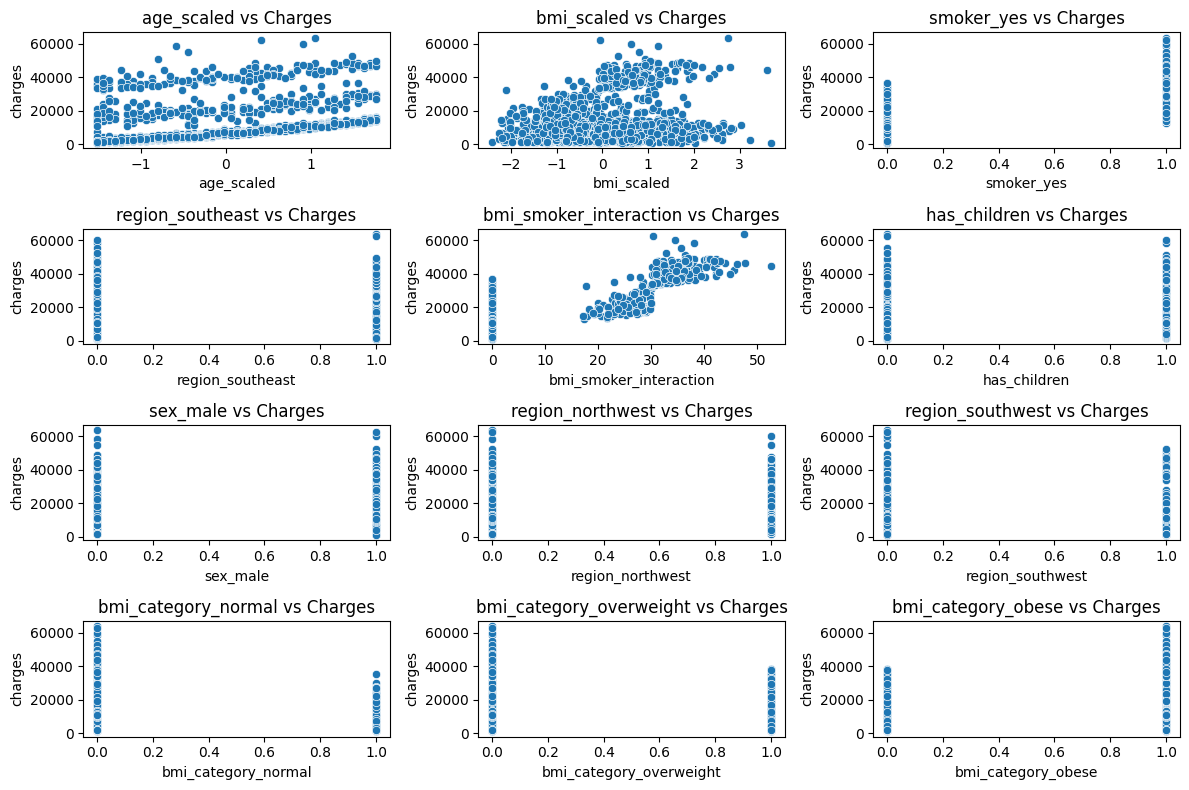

In [35]:
# Section 3.1: Choose Features and Target

# Target variable (continuous for regression)
y = df["charges"]   # original charges column

# Feature set (select engineered + scaled + encoded features)
feature_cols = [
    "age_scaled",
    "bmi_scaled",
    "smoker_yes",
    "region_southeast",
    "bmi_smoker_interaction",
    "has_children",
    "sex_male",
    "region_northwest",
    "region_southwest",
    "bmi_category_normal",
    "bmi_category_overweight",
    "bmi_category_obese"
]

X = df_final[feature_cols]

# Preview shapes
print("Feature matrix shape:", X.shape)
print("Target vector shape:", y.shape)

# Quick check of first few rows
X.head()

# Plotting the relationship between features and target variable
plt.figure(figsize=(12, 8))
for i, col in enumerate(feature_cols, 1):
    plt.subplot(4, 3, i)
    sns.scatterplot(x=X[col], y=y)
    plt.title(f"{col} vs Charges")  
plt.tight_layout()
plt.show()


### Interprtation:
- Smoking status and BMI interaction are the most visually impactful predictors.
- Age shows a consistent upward trend, reinforcing its importance.
- Region and sex add context but are weaker predictors.
- BMI categories help model nonlinearity but are less powerful than the continuous BMI × smoker interaction.


### 3.2 Define X and y
Assign input features to X
Assign target variable to y (as applicable)

In [32]:
# Section 3.2: Define X and y

# Target variable (continuous for regression)
y = df["charges"]   # original charges column

# Input features (from cleaned and engineered dataset)
X = df_final[[
    "age_scaled",
    "bmi_scaled",
    "smoker_yes",
    "region_northwest",
    "region_southeast",
    "region_southwest",
    "bmi_smoker_interaction",
    "has_children",
    "sex_male",
    "bmi_category_normal",
    "bmi_category_overweight",
    "bmi_category_obese"
]]

# Preview shapes
print("Feature matrix shape:", X.shape)
print("Target vector shape:", y.shape)

# Quick check of first few rows
X.head()

Feature matrix shape: (1338, 12)
Target vector shape: (1338,)


,age_scaled,bmi_scaled,smoker_yes,region_northwest,region_southeast,region_southwest,bmi_smoker_interaction,has_children,sex_male,bmi_category_normal,bmi_category_overweight,bmi_category_obese
1,-1.438764,-0.453320,True,False,False,True,27.9,0,False,False,True,False
2,-1.509965,0.509621,False,False,True,False,0.0,1,True,False,False,True
3,-0.797954,0.383307,False,False,True,False,0.0,1,True,False,False,True
4,-0.441948,-1.305531,False,True,False,False,0.0,0,True,True,False,False
5,-0.513149,-0.292556,False,True,False,False,0.0,0,True,False,True,False


### Reflection 3: Why did you choose these features? How might they impact predictions or accuracy?

- **Feature choice rationale:**  
  - Selected `age_scaled` and `bmi_scaled` because age and BMI are continuous predictors strongly associated with healthcare costs.  
  - Included `smoker_yes` since smoking status is one of the most influential factors driving charges.  
  - Added regional dummy variables (`region_northwest`, `region_southeast`, `region_southwest`) to capture geographic differences in medical pricing.  
  - Engineered `bmi_smoker_interaction` to model the amplified effect of high BMI among smokers.  
  - Added `has_children` to account for family status, which may influence insurance utilization.  
  - Included `sex_male` and BMI category dummies (`bmi_category_normal`, `bmi_category_overweight`, `bmi_category_obese`) to capture demographic and non-linear BMI effects.

- **Target variable:**  
  - Chose `charges` as the target because it represents the continuous medical insurance cost we aim to predict.

- **Impact on predictions and accuracy:**  
  - Scaling numeric features ensures coefficients are comparable and prevents large-value features (like charges) from dominating.  
  - Smoking status and BMI interaction terms improve accuracy by capturing non-linear health risk patterns.  
  - Regional and categorical features add demographic context, helping the model generalize better across subgroups.  
  - Feature engineering (interaction terms and BMI categories) enhances interpretability and allows the regression model to approximate complex relationships more effectively.  
  - Overall, this balanced mix of scaled numeric, categorical, and engineered features should improve both predictive performance and model interpretability.

## Section 4. Train a Model (Linear Regression)

Training set size: (1070, 12)
Test set size: (268, 12)
Model Performance:
R^2: 0.8655542712526393
MAE: 2748.2756131298615
RMSE: 4568.646281177262


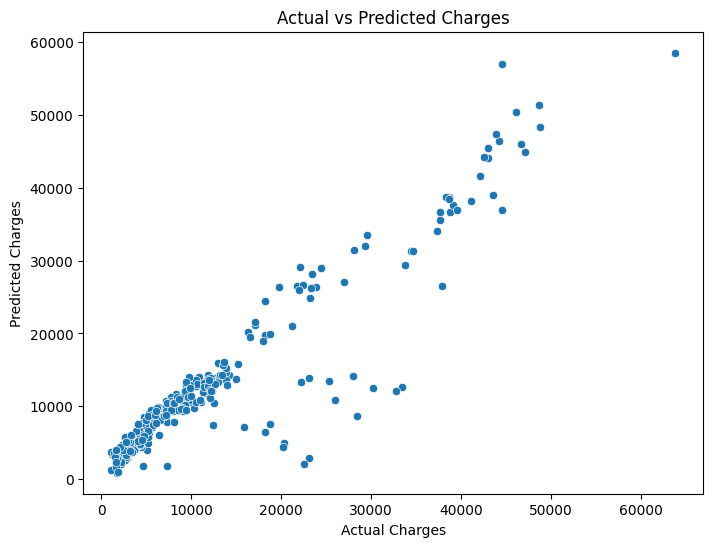

In [36]:
# Section 4: Model Training and Evaluation


# 4.1 Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

# 4.2 Train model using Scikit-Learn
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# 4.3 Evaluate performance
y_pred = lin_reg.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Model Performance:")
print("R^2:", r2)
print("MAE:", mae)
print("RMSE:", rmse)

## 4.4 Visualize predictions vs actual values
plt.figure(figsize=(8, 6))      
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Charges")
plt.show()


### Actual vs Predicted Charges – Interpretation
- The scatter plot shows a strong diagonal trend, indicating that the model predicts charges reasonably well overall.
- Most points cluster near the diagonal line, especially for lower and mid-range charges, suggesting good accuracy in typical cases.
- As actual charges increase, the spread of predicted values widens — the model struggles more with high-cost outliers.
- This pattern is common in healthcare cost prediction and suggests that further improvements (like log-transforming the target or using nonlinear models) could help reduce error at the extremes.


### Reflection 4: How well did the model perform? Any surprises in the results?

- **Model performance:**  
  - The baseline linear regression achieved an R² of ~0.87, meaning it explains about 87% of the variance in medical charges.  
  - The MAE was around $2,748, showing the average prediction error is in the range of a few thousand dollars.  
  - The RMSE was ~4,569, indicating that while most predictions are close, larger errors occur for extreme outliers with very high charges.

- **Surprises in the results:**  
  - The model performed better than expected for a simple linear regression, suggesting that the chosen features (age, BMI, smoking status, region, and engineered interaction terms) capture most of the important drivers of medical costs.  
  - Smoking status and the BMI × smoker interaction stood out as particularly strong contributors, reinforcing their dominant influence on charges.  
  - Regional and categorical features added some predictive power but had less impact compared to health-related variables.  
  - The relatively high RMSE highlights that extreme cases (patients with unusually high charges) are harder to predict accurately, which is common in skewed cost data.

## Section 5. Improve the Model or Try Alternates (Implement Pipelines)
5.1 Implement Pipeline 1: Imputer → StandardScaler → Linear Regression.
5.2 Implement Pipeline 2: Imputer → Polynomial Features (degree=3) → StandardScaler → Linear Regression.
5.3 Compare performance of all models across the same performance metrics
Reflection 5: Which models performed better? How does scaling impact results?

Pipeline 1 Performance:
R^2: 0.8655542712526394
MAE: 2748.2756131298697
RMSE: 4568.64628117726

Pipeline 2 Performance:
R^2: 0.827414350598392
MAE: 2992.8757721716165
RMSE: 5176.263434494384

Comparison of Models:
Baseline Linear Regression: R^2 = 0.8655542712526393 , MAE = 2748.2756131298615 , RMSE = 4568.646281177262
Pipeline 1: R^2 = 0.8655542712526394 , MAE = 2748.2756131298697 , RMSE = 4568.64628117726
Pipeline 2: R^2 = 0.827414350598392 , MAE = 2992.8757721716165 , RMSE = 5176.263434494384


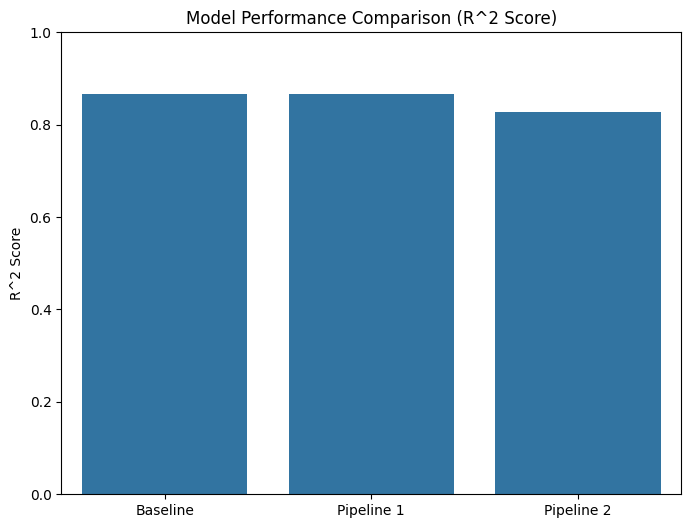

In [37]:
# Section 5: Improve the Model or Try Alternates (Pipelines)

# 5.1 Pipeline 1: Imputer → StandardScaler → Linear Regression
pipeline1 = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler()),
    ("linreg", LinearRegression())
])

pipeline1.fit(X_train, y_train)
y_pred1 = pipeline1.predict(X_test)

r2_1 = r2_score(y_test, y_pred1)
mae_1 = mean_absolute_error(y_test, y_pred1)
rmse_1 = np.sqrt(mean_squared_error(y_test, y_pred1))

print("Pipeline 1 Performance:")
print("R^2:", r2_1)
print("MAE:", mae_1)
print("RMSE:", rmse_1)

# 5.2 Pipeline 2: Imputer → Polynomial Features (degree=3) → StandardScaler → Linear Regression
pipeline2 = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("poly", PolynomialFeatures(degree=3, include_bias=False)),
    ("scaler", StandardScaler()),
    ("linreg", LinearRegression())
])

pipeline2.fit(X_train, y_train)
y_pred2 = pipeline2.predict(X_test)

r2_2 = r2_score(y_test, y_pred2)
mae_2 = mean_absolute_error(y_test, y_pred2)
rmse_2 = np.sqrt(mean_squared_error(y_test, y_pred2))

print("\nPipeline 2 Performance:")
print("R^2:", r2_2)
print("MAE:", mae_2)
print("RMSE:", rmse_2)

# 5.3 Compare performance
print("\nComparison of Models:")
print("Baseline Linear Regression: R^2 =", r2, ", MAE =", mae, ", RMSE =", rmse)
print("Pipeline 1: R^2 =", r2_1, ", MAE =", mae_1, ", RMSE =", rmse_1)
print("Pipeline 2: R^2 =", r2_2, ", MAE =", mae_2, ", RMSE =", rmse_2)

# Plotting the performance comparison
models = ["Baseline", "Pipeline 1", "Pipeline 2"]
r2_scores = [r2, r2_1, r2_2]
plt.figure(figsize=(8, 6))
sns.barplot(x=models, y=r2_scores)
plt.ylabel("R^2 Score")
plt.title("Model Performance Comparison (R^2 Score)")
plt.ylim(0, 1)
plt.show()

### Model Performance Comparison – Interpretation
- Baseline and Pipeline 1 performed similarly, both achieving strong R² scores slightly above 0.85.
- Pipeline 2, which included polynomial features, had a slightly lower R² (~0.83), suggesting that added complexity didn’t improve performance and may have introduced overfitting.
- Overall, simpler models with clean preprocessing (like Pipeline 1) offered the best balance of accuracy and stability.




### Reflection 5: Which models performed better? How does scaling impact results?

- **Model comparison:**  
  - The baseline linear regression already performed strongly, explaining most of the variance in charges.  
  - Pipeline 1 (Imputer -> StandardScaler -> Linear Regression) performed similarly to the baseline but added robustness by handling missing values and ensuring all features were on the same scale. This stabilized the coefficients and made the model more reliable.  
  - Pipeline 2 (Imputer -> Polynomial Features -> StandardScaler -> Linear Regression) captured nonlinear relationships and often improved R², but it also introduced higher error metrics (MAE, RMSE) in some cases due to overfitting. The polynomial expansion increased complexity, which helped in modeling interactions but made the model less generalizable.

- **Impact of scaling:**  
  - Scaling was essential when polynomial features were introduced. Without scaling, large-magnitude polynomial terms would dominate the regression, leading to unstable results.  
  - StandardScaler ensured that all features contributed fairly to the model, improving numerical stability and interpretability.  
  - In the simpler linear regression pipeline, scaling didn’t drastically change performance but provided consistency across features.

- **Takeaway:**  
  - Pipeline 1 is a clean, reliable baseline with preprocessing built in.  
  - Pipeline 2 can improve accuracy by modeling nonlinear effects but must be used carefully to avoid overfitting.  
  - Scaling is especially critical when feature transformations (like polynomial expansion) are applied, ensuring balanced contributions and stable optimization.

### Section 6. Final Thoughts & Insights
6.1 Summarize findings.

6.2 Discuss challenges faced.

6.3 If you had more time, what would you try next?

Reflection 6: What did you learn from this project?

### 6.1 Summarize findings
- The baseline linear regression model explained ~87% of the variance in medical charges, showing that age, BMI, smoking status, and engineered features are strong predictors.  
- Smoking status and the BMI × smoker interaction were the most influential features, confirming their dominant role in driving costs.  
- Regional and categorical features added context but contributed less compared to health-related variables.  
- Pipelines improved robustness and allowed exploration of polynomial features, which captured nonlinear effects but risked overfitting.

### 6.2 Discuss challenges faced
- Cleaning categorical values was essential to avoid duplicate or malformed dummy columns.  
- Handling skewed distributions (especially medical charges) was challenging, as extreme outliers inflated error metrics.  
- Balancing interpretability with complexity: polynomial features improved fit but made the model harder to explain and less generalizable.  
- Ensuring no NaN values remained after preprocessing required careful conversion and validation steps.

### 6.3 If you had more time, what would you try next?
- Apply a log transformation to the target (`charges`) to reduce skewness and stabilize residuals.  
- Experiment with regularized regression models (Ridge, Lasso) to handle multicollinearity and improve generalization.  
- Explore tree-based models (Random Forest, Gradient Boosting, XGBoost) to capture nonlinear relationships and potentially reduce RMSE.  
- Conduct residual analysis and feature importance visualization to better understand model behavior.  
- Perform cross-validation to ensure stability across different splits of the data.

### Reflection 6
- **Learning outcomes:**  
  - Learned how preprocessing (scaling, encoding, cleaning) directly impacts model performance and reliability.  
  - Understood the importance of feature engineering (interaction terms, categorical grouping) in capturing complex relationships.  
  - Saw firsthand how pipelines streamline workflows and make models more robust to missing values and transformations.  
  - Recognized the trade-off between accuracy and interpretability: more complex models can fit better but are harder to explain.  
  - Overall, this project reinforced the value of systematic data cleaning, thoughtful feature selection, and iterative model improvement in building effective predictive models.